Algoritmo de Clustering Fuzzy C Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
df = pd.read_csv("/Users/tomas/Desktop/Facultad/Cuarto/2doCuatri/IA-Facultad/clase1/datos3.csv",sep=';')
dfTransformed= df.replace('E','e', regex = True).replace(',','.', regex = True)
X = dfTransformed.to_numpy().astype(float)

In [3]:
def distance(x1,x2):
            return np.sqrt(np.sum(x1-x2)**2)

def add(number):
    return 1 / number
        
class Clustering:
    def __init__(self, K , iter = 1):
        self.K = K
        self.iter = iter
        #Inicializamos los clusters random, en una lista de listas vacia donde almacenaremos los indices
        self.clusters = [[] for i in range(K)]
        #Lista de vectores donde almacenaremos la media.
        self.centroids = [[] for i in range(K)]
        
    def FCM(self,X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        self.centroids = self.initializeRandomPoints()
        #self.centroids = self.initializePointsInTheData()
        
        for i in range(self.iter):
            #La implementacion va a ser igual a la de HCM
            self.clusters = self.createClusters()
            old_centroids = self.centroids
            self.centroids = self.createMeans()
            old_clusters = self.clusters
            self.clusters = self.createClusters()
                                                
            # 3)Comparo ambos clusters y verifico si son los mismos, si son los mismos significa que convergio y si no repito
            convergio = self.converged(old_clusters, self.clusters)
            if convergio: 
                break
                
        # De la matriz de pertenencia me quedo con el mas grande
        points = np.argmax(self.clusters, axis = 1)            
        plt.scatter(self.X[:,0], self.X[:,1], c = points)
            
    def createClusters(self):
        clusters = [[] for i in range(self.K)]
        matrizP = np.zeros(shape = (self.n_samples , self.K))
        distances = np.zeros(shape = (self.n_samples , self.K))
        denominador = 0
        
        #Creo matriz de distancias N x K
        for index, point in enumerate(self.X):
            distances[index] = [distance(point,self.centroids[i]) for i in range(self.K)]
            
        #Creo matriz de pertenencias N x K
        newMatrix = np.array(list(map(add, distances)))
        sumDistances = np.sum(newMatrix, axis = 1 , dtype=np.float64)
        
        # [ 1/ dist(dato,c1) , 1/dist(dato,c2) , 1/dist(dato,c3)]
        # Como hago para optimizar esto?
        for sample in range(self.n_samples):
            sum = sumDistances[sample]
            for i in range(self.K):
                denominador = sum * distances[sample,i]
                
                #  dist(dato, ck) * [ 1/ dist(dato,ck) , 1/dist(dato,c2) , 1/dist(dato,c3)] ** (2 / q-1)
                matrizP[sample,i] =  1 / denominador
        return matrizP
        
    def createMeans(self):
        #Para hacer el promedio en este caso , utilizamos el promedio ponderado
        #np.dot se usa para multiplicaciones de matrices
        numerator = np.dot(self.X.T ,self.clusters).reshape(5,2)
        sumMedias = np.sum(self.clusters , axis = 0)
        means = [ numerator[i] / sumMedias[i] for i in range(self.K)]
        return np.stack(means)
    
    def converged(self, old_clusters, new_clusters):
        for i in range(self.K):
            suma1 = sum(old_clusters[i])
            suma2 = sum(new_clusters[i])
            if ( (suma1 - suma2) != 0):
                return False
        return True
    
    def initializePointsInTheData(self):
        random_ids = np.random.choice(self.n_samples, self.K, replace = False)
        return self.X[random_ids]
        
    
    def initializeRandomPoints(self):
        min = np.min(X[:,0])
        max = np.max(X[:,0])
        x = np.random.uniform(min,max, size = (self.K,1))
        min = np.min(X[:,1])
        max = np.max(X[:,1])
        y = np.random.uniform(min,max, size = (self.K,1))
        array1 = []
        array2 = []
        for i in range(self.K):
            array1.append(x[i][0])
            array2.append(y[i][0])
        return np.array((array1,array2)).reshape(5,2)
        

[[3.94006932e+07 7.23593840e+07]
 [3.24719612e+07 3.58881049e+07]
 [3.73899689e+07 5.41218062e+07]
 [1.20684801e+08 6.01643145e+07]
 [4.04156402e+07 3.80806508e+07]]


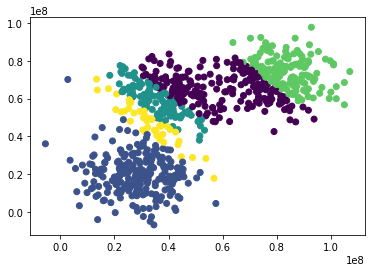

In [4]:
clustering = Clustering(5)
clustering.FCM(X)